In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [2]:
#import sys
#!{sys.executable} -m pip install tensorflow

In [2]:
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [4]:
x= data.drop('0',axis=1)
x
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 784 entries, 0.1 to 0.648
dtypes: float32(784)
memory usage: 1.1 GB


In [5]:
y=data['0']
y
# y.info()

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [6]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [7]:
x_train.info()
len(x_train.values[0])
x_train.shape[0]
x_train1=x_train.copy()
x_test1=x_test.copy()
print(x_train1.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297960 entries, 156264 to 243475
Columns: 784 entries, 0.1 to 0.648
dtypes: float32(784)
memory usage: 893.4 MB
297960


In [11]:
x_train = np.reshape(x_train1.values,(x_train1.shape[0],28,28))
x_train.shape
# len(x_train)
# x_train.ndim

(297960, 28, 28)

In [12]:
x_test = np.reshape(x_test.values,(x_test1.shape[0],28,28))

In [13]:
s_data = shuffle(x_train1)

In [14]:
shuffle_data = shuffle(x_train)

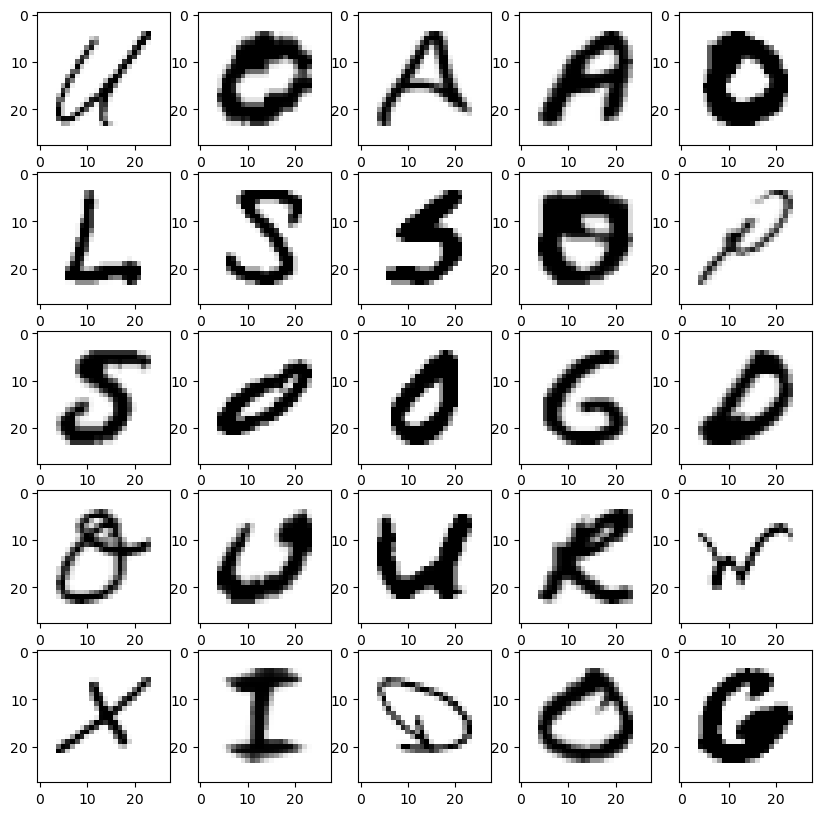

In [15]:
import cv2
fig, axes = plt.subplots(5,5
                         , figsize = (10,10))
axes = axes.flatten()
for i in range(25):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [16]:
x_train.shape[0]
x_train.shape[1]
x_train.shape[2]

28

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')


C:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\anaconda3\envs\testenv\lib\site-packages\tensorf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [18]:
model = Sequential()
 
model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))
 
model.add(Flatten())
 
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [28]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=2,  validation_data = (x_test,y_testing))

Epoch 1/2
9312/9312 [==============================] - 228s 24ms/step - loss: 0.2265 - accuracy: 0.9358 - val_loss: 0.1472 - val_accuracy: 0.9562
Epoch 2/2
9312/9312 [==============================] - 220s 24ms/step - loss: 0.1128 - accuracy: 0.9680 - val_loss: 0.1060 - val_accuracy: 0.9717


In [29]:
model.save(r'handwritten_character_recog_model.h5')

In [30]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

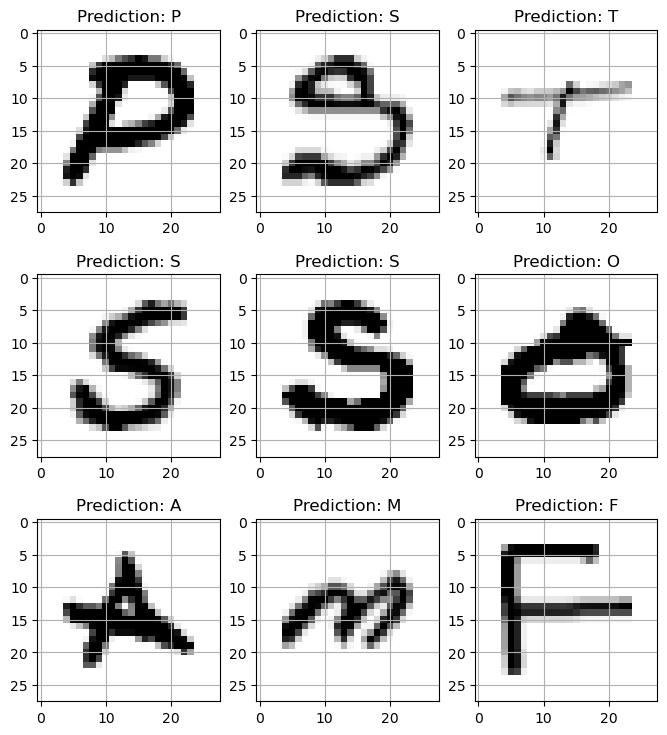

In [31]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

1/1 [==============================] - 0s 54ms/step
[[1.7169867e-10 2.0128041e-07 2.5695863e-05 2.2651792e-09 3.9260935e-06
  2.1505676e-13 5.3233573e-05 4.0332914e-13 4.6872679e-12 1.1109800e-04
  3.5415390e-08 3.9579340e-05 6.5627236e-15 8.1242576e-13 1.6358327e-06
  3.6227413e-10 1.2712786e-08 2.2118833e-09 9.9975675e-01 3.2566081e-07
  1.5493977e-09 8.9250472e-17 9.5579950e-16 5.0380726e-09 3.4362063e-08
  7.5106418e-06]]
The image is of S


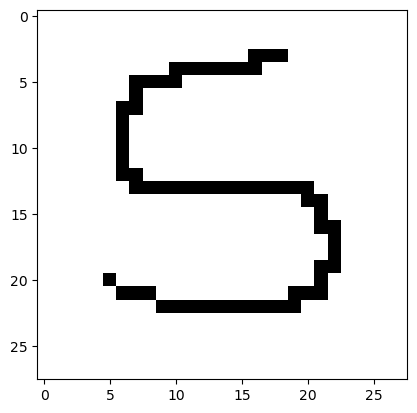

In [32]:
try:
    img = cv2.imread("R.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred= model.predict(img)
    print(pred)
    print(f"The image is of {words[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error.")

In [5]:
import tensorflow as tf
import numpy as np
import cv2
model=tf.keras.models.load_model('handwritten_character_recog_model.h5')
# try:
img = cv2.imread("R1.png")[:,:,0]
img = np.invert(np.array([img]))
pred= model.predict(img)
print(f"The image is of {words[np.argmax(pred)]}")
plt.imshow(img[0],cmap=plt.cm.binary)
plt.show()
# except:
print("Error.")

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (1, 28, 28)

1/1 [==============================] - 0s 35ms/step
The image is of X


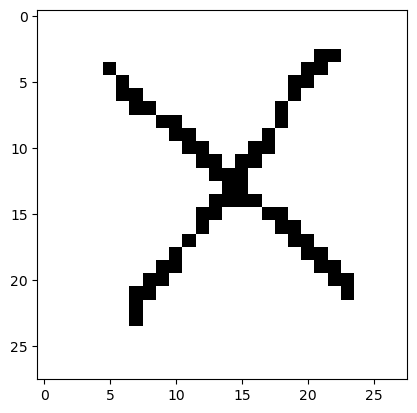

In [34]:
try:
    img = cv2.imread("RRR.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred= model.predict(img)
    print(f"The image is of {words[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error.")

1/1 [==============================] - 0s 29ms/step
The image is of P


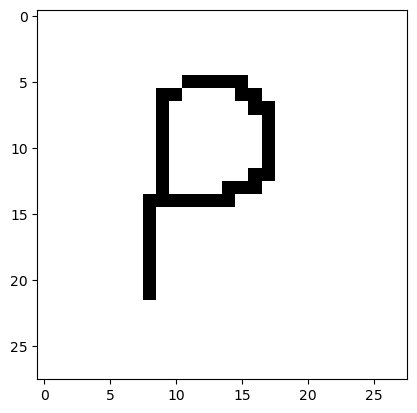

In [35]:
try:
    img = cv2.imread("R4.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred= model.predict(img)
    print(f"The image is of {words[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error.")

1/1 [==============================] - 0s 29ms/step
The image is of R


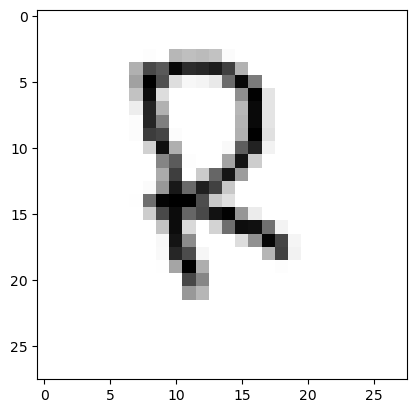

In [45]:
try:
    img = cv2.imread("user_input.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred= model.predict(img)
    print(f"The image is of {words[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error.")

In [9]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
from PIL import Image
width = 100  # canvas width
height = 100 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)
def Close():
    root.destroy()

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=100, height=100, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()
image = Image.open('user_input.png')
image.thumbnail((28, 28))
image.save('user_input.png')

try:
    img = cv2.imread("user_input.png")[:,:,0]
    img = np.invert(np.array([img]))
    pred= model.predict(img)
    print(f"The image is of {words[np.argmax(pred)]}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error.")

Error.
